Функция $f(x)$ приближается на $[a, b]$ по $n$ равноотстоящим узлам $x_i = a + \frac{b - a}{n - 1}(i - 1),  i = 1, ... , n$. Найти наибольшее целое $p$ в оценке погрешности $\|f(x) - L_n (x)\|  \leq 10^{-p}$ в равномерной норме для случая $[-1, 0]$, $f(x) = e^x$, $n = 3$

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
sns.set()

from scipy.interpolate import lagrange

import matplotlib.pyplot as plt
%matplotlib inline

Функция, которая рассчитывает узлы интерполяции

In [2]:
def get_nodes(a, b, n):
    x = []
    for i in range(n):
        x.append(a + (b - a) * i / (n - 1))
    return x

Построим теперь интерполяционный многочлен Лагранжа, используя код из прошлой лабораторной

In [3]:
def build_lagrange_poly_and_plot(a, b, N):
    """Builds of lagrange polynom
    """
    x_n = get_nodes(a, b, N)
    space = np.linspace(a, b, 50)
    y_n = np.exp(x_n)
    y_space = np.exp(space)
    poly = lagrange(x_n, y_n)    
    data = pd.concat([pd.Series(space), \
                      pd.Series(y_space), \
                      pd.Series(np.polyval(poly, space))], axis = 1)
    data = pd.DataFrame(data)
    data.columns = ['x', 'real', 'lagrange']
    data.set_index(['x'], drop = True, inplace = True)
    plt.figure(figsize=(12, 8))
    sns.lineplot(data = data)
    return space, y_space, poly

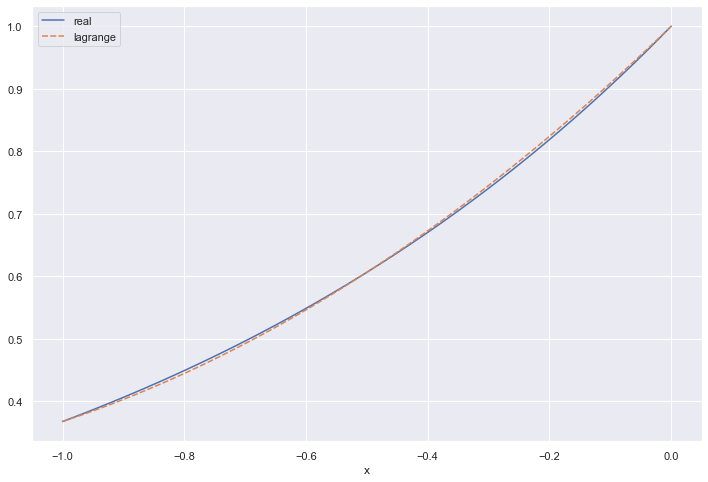

In [9]:
a = -1
b = 0
n = 3
x_n, y_n, poly = build_lagrange_poly_and_plot(a, b, n)

Оценим погрешность по формуле: $\|f(x) - L_n (x)\|  \leq \frac{\|f^{(n)}\| (b - a)^{n} 2 ^{1-2n}}{n!}$

In [10]:
difference = poly[0] * ((b - a) ** n) * 2**(1 - 2*n) / np.math.factorial(n)
norma = np.linalg.norm(difference)
norma

0.005208333333333333

Отсюда $p = -\log_{10} (difference)$

In [11]:
p = np.floor(-np.log10(difference))
p

2.0